# TensorFlow Autoencoder

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Import MNIST Dataset

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./MNIST_data', one_hot=False)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


---

## Build Network

Hyperparams

In [16]:
learning_rate = 0.0001
batch_size    = 256

image_size    = 784
hidden_1_size = 256
hidden_2_size = 128
encoder_size  = 10

Placeholders

In [13]:
with tf.name_scope('Placeholder'):
    image = tf.placeholder(shape=[None, image_size], dtype=tf.float32, name='image')

Encoder

In [17]:
with tf.name_scope('Encoder'):
    """
      784 -> 256 -> 128 -> 10
    """
    encoder_hidden_1 = tf.layers.dense(
        inputs=image,
        units=hidden_1_size,
        activation=tf.nn.relu,
        name='Encoder_hidden_1'
    )
    encoder_hidden_2 = tf.layers.dense(
        inputs=encoder_hidden_1,
        units=hidden_2_size,
        activation=tf.nn.relu,
        name='Encoder_hidden_2'
    )
    encoder_output = tf.layers.dense(
        inputs=encoder_hidden_1,
        units=encoder_size,
        activation=tf.nn.relu,
        name='Encoder_output'
    )

Decoder

In [19]:
with tf.name_scope('Decoder'):
    """
      10 -> 128 -> 256 -> 784
    """
    decoder_hidden_2 = tf.layers.dense(
        inputs=encoder_output,
        units=hidden_2_size,
        activation=tf.nn.relu,
        name='Decoder_hidden_2'
    )
    decoder_hidden_1 = tf.layers.dense(
        inputs=decoder_hidden_2,
        units=hidden_1_size,
        activation=tf.nn.relu,
        name='Decoder_hidden_1'
    )
    decoder_output = tf.layers.dense(
        inputs=decoder_hidden_1,
        units=image_size,
        activation=tf.nn.relu,
        name='Decoder_output'
    )

Train & Loss

In [21]:
with tf.name_scope('Train_and_loss'):
    loss = tf.losses.mean_squared_error(labels=image, predictions=decoder_output)
    train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Train the network

Loss 0.106705
Loss 0.0214677
Loss 0.0209975
Loss 0.0193548
Loss 0.0174813
Loss 0.0185358
Loss 0.0180535
Loss 0.0168436
Loss 0.0169895
Loss 0.0173681
Loss 0.0158721


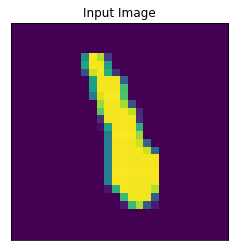

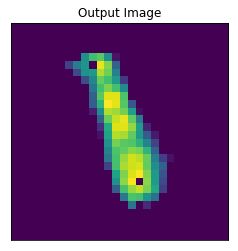

In [39]:
with tf.Session() as sess:

    # Init
    sess.run(tf.global_variables_initializer())

    for i in range(10001):
        sess.run(train, feed_dict={
            image: mnist.train.next_batch(batch_size)[0]
        })
        if i%1000 == 0:
            print("Loss", sess.run(loss, feed_dict={
                image: mnist.train.next_batch(100)[0]
            }))

    # Test encoding & decoding
    input_img   =  mnist.test.next_batch(1)[0]
    predict_img = sess.run(decoder_output, feed_dict={image: input_img})[0]

    plt.figure()
    plt.xticks(())
    plt.yticks(())
    plt.title('Input Image')
    plt.imshow(input_img[0].reshape((28, 28)))

    plt.figure()
    plt.xticks(())
    plt.yticks(())
    plt.title('Output Image')
    plt.imshow(predict_img.reshape((28, 28)))
    plt.show()